<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-08-15 13:33:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.7MB/s    in 2.5s    

2025-08-15 13:33:27 (59.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [4]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [5]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [6]:
# Set max_rows to None to display all rows
pd.set_option('display.max_rows', None)
# Set the option to display all columns
pd.set_option('display.max_columns', None)
# ===================================================================================================
# Functional automatization & Data Preprocessing

def get_summary_stats(df):
    """
    Returns summary statistics for each column in the DataFrame.
    """
    return pd.DataFrame({
        "Column name": df.columns,  # Column names
        "DataType": df.dtypes.values,  # Data types of columns
        "Number of rows": df.shape[0],  # Total number of rows
        "Number of columns": df.shape[1],  # Total number of columns
        "Not-Null Columns": df.notnull().sum().values,  # Count of non-missing values
        "Missing Count": df.isnull().sum().values,  # Count of missing values
        "Missing Percentage": (df.isnull().mean() * 100).values  # Percentage of missing values
    })

summary_stats = get_summary_stats(df)
display(summary_stats)

# ===================================================================================================

# ===================================================================================================
def split_and_explode(df, column, sep=';'):
    """
    Split a column by a separator and explode it into multiple rows.
    Also strips leading/trailing spaces from each element.

    df: input DataFrame
    column: name of the column to split & explode
    sep: separator to split the string (default: ';')
    """
    df_copy = df.copy()
    # Split the column
    df_copy[column] = df_copy[column].str.split(sep)
    # Explode into multiple rows
    df_copy = df_copy.explode(column)
    # Remove leading/trailing spaces
    df_copy[column] = df_copy[column].str.strip()
    
    return df_copy
# ===================================================================================================

# ===================================================================================================
# Age mapping
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# YearsCodePro mapping
years_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

def prepare_dataframe(df, columns, remove_outliers=False, iqr_column=None):
    """
    Prepares a DataFrame for plotting or analysis.
    
    Parameters:
        df (DataFrame): Original DataFrame.
        columns (list): List of columns to keep (drop rows with NaN in these columns).
        remove_outliers (bool): Whether to remove extreme values using IQR.
        iqr_column (str): Column used for IQR calculation.
    
    Returns:
        DataFrame: Cleaned DataFrame ready for analysis.
    """
    df_clean = df.copy()
    
    # Map Age values to numerical values
    if 'Age' in df_clean.columns:
        df_clean['Age_mapped'] = df_clean['Age'].map(age_mapping)
    
    # Replace text-based YearsCodePro values and convert to numeric
    if 'YearsCodePro' in df_clean.columns:
        df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace(years_mapping)
        df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
    
    # Drop NaN values in the required columns
    df_clean = df_clean.dropna(subset=columns).copy()
    
    # Remove outliers if enabled
    if remove_outliers and iqr_column:
        Q1 = df_clean[iqr_column].quantile(0.25)
        Q3 = df_clean[iqr_column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[iqr_column] >= lower) & (df_clean[iqr_column] <= upper)].copy()
    
    return df_clean
# ===================================================================================================

,Column name,DataType,Number of rows,Number of columns,Not-Null Columns,Missing Count,Missing Percentage
0,ResponseId,int64,65437,114,65437,0,0.000000
1,MainBranch,object,65437,114,65437,0,0.000000
2,Age,object,65437,114,65437,0,0.000000
3,Employment,object,65437,114,65437,0,0.000000
4,RemoteWork,object,65437,114,54806,10631,16.246160
5,Check,object,65437,114,65437,0,0.000000
6,CodingActivities,object,65437,114,54466,10971,16.765744
7,EdLevel,object,65437,114,60784,4653,7.110656
8,LearnCode,object,65437,114,60488,4949,7.563000
9,LearnCodeOnline,object,65437,114,49237,16200,24.756636


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


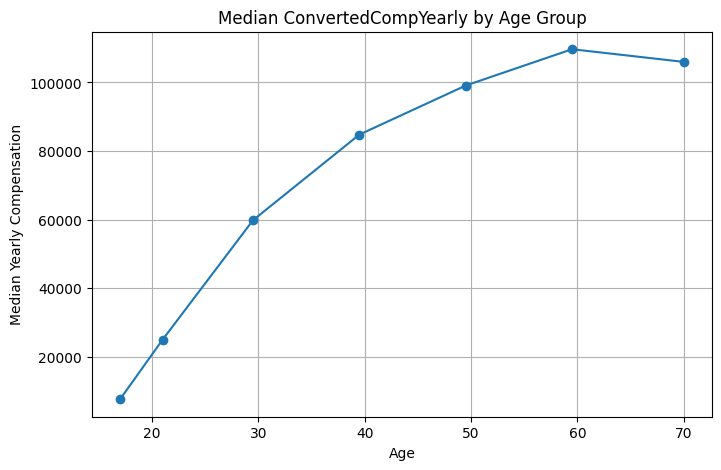

In [11]:
## Write your code here
# df['JobSatPoints_6'].unique()

# Map the Age column to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Calculate median ConvertedCompYearly by Age group
median_by_age = df.groupby('AgeNumeric')['ConvertedCompYearly'].median().sort_index()

# Plot the line chart
plt.figure(figsize=(8,5))
plt.plot(median_by_age.index, median_by_age.values, marker='o')
plt.title('Median ConvertedCompYearly by Age Group')
plt.xlabel('Age')
plt.ylabel('Median Yearly Compensation')
plt.grid(True)
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


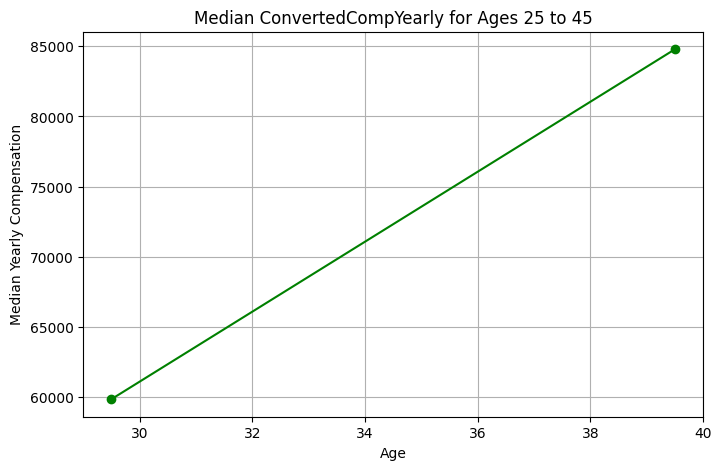

In [12]:
## Write your code here
# Map the Age column to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Filter data for ages between 25 and 45
df_filtered = df[(df['AgeNumeric'] >= 25) & (df['AgeNumeric'] <= 45)]

# Calculate median ConvertedCompYearly by Age group
median_by_age = df_filtered.groupby('AgeNumeric')['ConvertedCompYearly'].median().sort_index()

# Plot the line chart
plt.figure(figsize=(8,5))
plt.plot(median_by_age.index, median_by_age.values, marker='o', color='green')
plt.title('Median ConvertedCompYearly for Ages 25 to 45')
plt.xlabel('Age')
plt.ylabel('Median Yearly Compensation')
plt.grid(True)
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


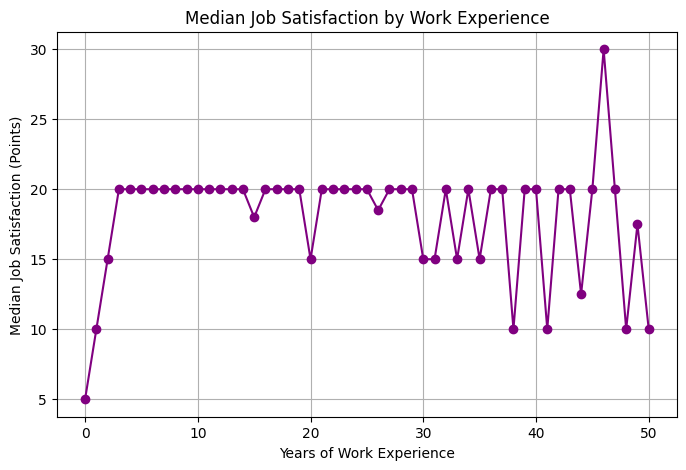

In [13]:
## Write your code here
# Filter out rows where WorkExp or JobSatPoints_6 is missing
df_filtered = df.dropna(subset=['WorkExp', 'JobSatPoints_6'])

# Calculate median JobSatPoints_6 by WorkExp
median_jobsat_by_exp = df_filtered.groupby('WorkExp')['JobSatPoints_6'].median().sort_index()

# Plot the line chart
plt.figure(figsize=(8,5))
plt.plot(median_jobsat_by_exp.index, median_jobsat_by_exp.values, marker='o', color='purple')
plt.title('Median Job Satisfaction by Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Median Job Satisfaction (Points)')
plt.grid(True)
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


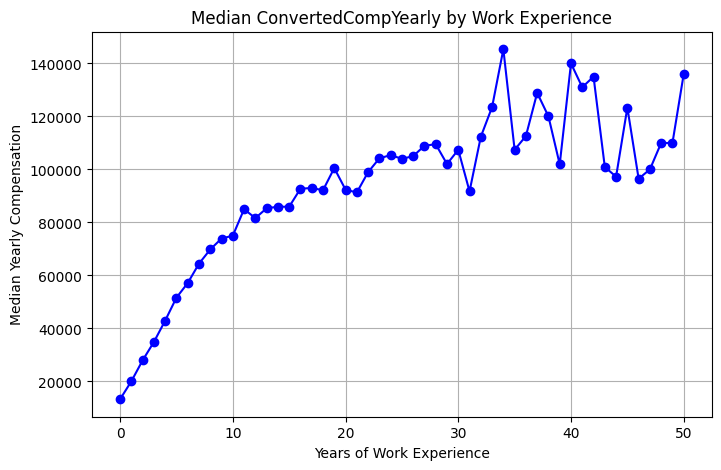

In [16]:
## Write your code here
# df.columns.to_list()

# Filter out rows where WorkExp or ConvertedCompYearly is missing
df_filtered = df.dropna(subset=['WorkExp', 'ConvertedCompYearly'])

# Calculate median ConvertedCompYearly by WorkExp
median_comp_by_exp = df_filtered.groupby('WorkExp')['ConvertedCompYearly'].median().sort_index()

# Plot the line chart
plt.figure(figsize=(8,5))
plt.plot(median_comp_by_exp.index, median_comp_by_exp.values, marker='o', color='blue')
plt.title('Median ConvertedCompYearly by Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Median Yearly Compensation')
plt.grid(True)
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


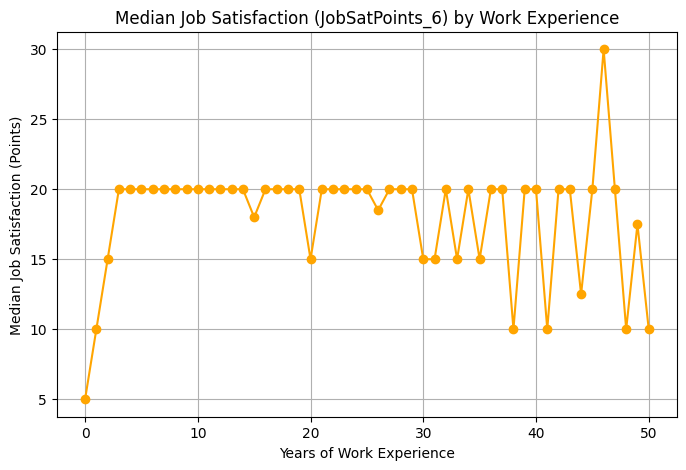

All codebases written by Diyor


In [18]:
## Write your code here
# Filter out rows where WorkExp or JobSatPoints_6 is missing
df_filtered = df.dropna(subset=['WorkExp', 'JobSatPoints_6'])

# Calculate median JobSatPoints_6 by WorkExp
median_jobsat_by_exp = df_filtered.groupby('WorkExp')['JobSatPoints_6'].median().sort_index()

# Plot the line chart
plt.figure(figsize=(8,5))
plt.plot(median_jobsat_by_exp.index, median_jobsat_by_exp.values, marker='o', color='orange')
plt.title('Median Job Satisfaction (JobSatPoints_6) by Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Median Job Satisfaction (Points)')
plt.grid(True)
plt.show()

name = "Diyor"
print(f'All codebases written by {name}')

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
